<a href="https://colab.research.google.com/github/parvvaresh/Covid-19-Vaccines-Analysis-with-Python/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py

In [2]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load data set

path_file = "/content/drive/MyDrive/Covid-19 Vaccines Analysis/data set/Covid 19 Vaccines Location.csv"
df = pd.read_csv(path_file)

In [7]:
#see data set 
df.head(3)

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Afghanistan,AFG,"CanSino, Covaxin, Johnson&Johnson, Moderna, Ox...",2023-01-22,World Health Organization,https://covid19.who.int/
1,Albania,ALB,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",2023-01-08,World Health Organization,https://covid19.who.int/
2,Algeria,DZA,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",2022-09-04,World Health Organization,https://covid19.who.int/


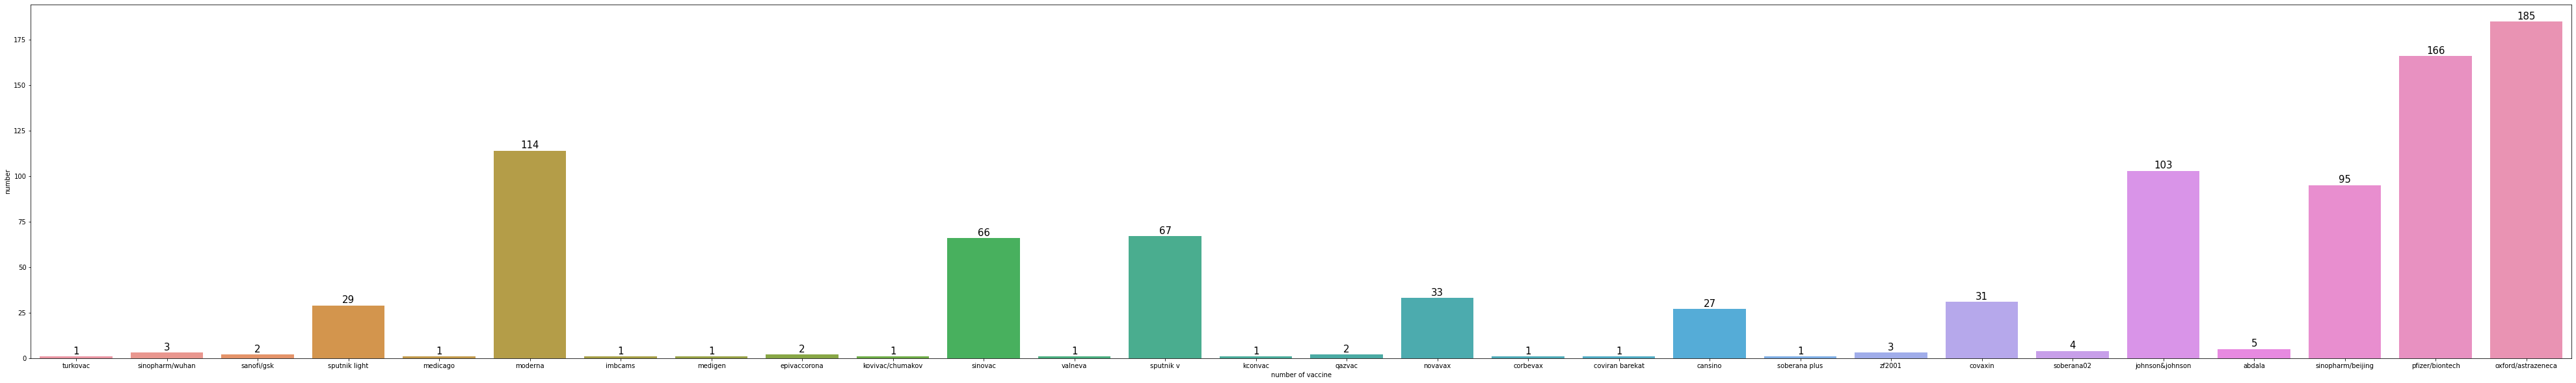

In [28]:
#Let's see how many times each vaccines has been repeated
country = []


#cleaning data
for element in list(df["vaccines"]):
  temp = element.split(",")
  temp = [vaccine.lower() for vaccine in temp]
  temp = ["".join(vaccine.rstrip()) for vaccine in temp]
  temp = ["".join(vaccine.lstrip()) for vaccine in temp]
  country.extend(temp)


#count vaccine
counter = {}

for vaccine in set(country):
  counter.update({vaccine : 0})

for vaccine in country:
  counter[vaccine] += 1

data = pd.DataFrame({
    "number of vaccine" : list(counter.keys()),
    "number" : list(counter.values())

})

plt.figure(figsize = (70 , 10))
plots = sns.barplot(x = "number of vaccine", y = 'number', data=data)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

In [33]:
#What vaccines did each country use?

temp = df[["location", "vaccines"]]

for index in range(0, temp.shape[0]):
  country = temp.iloc[index]["location"]
  vaccine = temp.iloc[index]["vaccines"]
  print(f"{country}  -------> {vaccine}")

Afghanistan  -------> CanSino, Covaxin, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik Light, Sputnik V
Albania  -------> Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Algeria  -------> Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Andorra  -------> Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Angola  -------> Oxford/AstraZeneca
Anguilla  -------> Oxford/AstraZeneca, Pfizer/BioNTech
Antigua and Barbuda  -------> Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Argentina  -------> CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Armenia  -------> Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, Sputnik Light, Sputnik V
Aruba  -------> Pfizer/BioNTech
Australia  -------> Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech
Austria  -------> Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/Bio

In [36]:
#map plot live 
vaccine_map = px.choropleth(df, locations = 'iso_code', color = 'vaccines')
vaccine_map.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
vaccine_map.show()